필요한 라이브러리 불러오기<br>데이터 불러오기

판다스 버전 : 1.3.4<br>
kiwipiepy 버전 : 0.17.0<br>
sklearn 버전 : 1.0.2<br>

In [1]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4

In [2]:
# kiwipiepy를 설치합니다.
!pip install kiwipiepy==0.17.0

In [3]:
# 버전 확인용
import pandas as pd
import kiwipiepy
import sklearn

print("판다스 버전 :", pd.__version__)
print("kiwipiepy 버전 :", kiwipiepy.__version__)
print("sklearn 버전 :", sklearn.__version__)

판다스 버전 : 1.3.4
kiwipiepy 버전 : 0.17.0
sklearn 버전 : 1.0.2


만약 sklearn 버전이 1.0.2가 아닐 경우 #을 제거하고 아래 코드를 실행해주세요.

In [4]:
#!pip uninstall scikit-learn

In [5]:
#!pip install scikit-learn==1.0.2 

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 100)

import re
from kiwipiepy import Kiwi

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\it\AppData\Local\Temp\ipykernel_11552\1249155567.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [7]:
filepath = './data'
dc = pd.read_excel(filepath + "/디시인사이드_편의점게시물.xlsx")

In [8]:
dc.head(2)

,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H)
0,편의점 손님,편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손님이 90~1...,편의점2022.06.02 19:33,2022.06.02,19:33,목요일,19
1,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임,아이스크림 먹으면서 보고싶어 감자칩이랑,기타 국내 드라마2022.06.02 19:32,2022.06.02,19:32,목요일,19


정규표현식을 이용해 전처리 진행

In [9]:
print('데이터 크기 확인 :', dc.shape)
dc['글'] = dc['게시물제목'] + " " + dc['내용']
dc['글'] = dc['글'].astype('str') #①
dc['글_한글'] = dc['글'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x))) #②
dc.head(2)

데이터 크기 확인 : (2496, 7)


,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H),글,글_한글
0,편의점 손님,편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손님이 90~1...,편의점2022.06.02 19:33,2022.06.02,19:33,목요일,19,편의점 손님 편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손...,편의점 손님 편의점 일하시는 분들 밤 시에서 아침 시 야간 시간 일하는데 손님이 명...
1,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임,아이스크림 먹으면서 보고싶어 감자칩이랑,기타 국내 드라마2022.06.02 19:32,2022.06.02,19:32,목요일,19,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임 아이스크림 먹으면서 보고싶어 ...,축구 몇시부터야 편의점 다녀와도 될까 분거리임 아이스크림 먹으면서 보고싶어 감자칩이랑


형태소 분석 - 예제

In [10]:
kiwi = Kiwi()

In [11]:
text = '나는 학교에 간다'
kiwi.tokenize(text)

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='는', tag='JX', start=1, len=1),
 Token(form='학교', tag='NNG', start=3, len=2),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='가', tag='VV', start=7, len=1),
 Token(form='ᆫ다', tag='EF', start=7, len=2)]

In [12]:
text = '나는 학교에 간다'
result = kiwi.tokenize(text)

nouns = []
for token in result:
    if token.tag=='NNG':
        nouns.append(token.form)

print("입력한 문장에서 명사 추출 결과 :",nouns)

입력한 문장에서 명사 추출 결과 : ['학교']


In [13]:
nouns = [token.form for token in result if token.tag=='NNG']
print("입력한 문장에서 명사 추출 결과 :",nouns)

입력한 문장에서 명사 추출 결과 : ['학교']


형태소 분석 - 디시인사이드

In [14]:
def find_nouns(text):
    """입력된 문장에서 명사 추출해 리스트로 반환"""

    tokens = kiwi.tokenize(text)

    target_words = []
    for wrd in tokens:
        if 'NN' in wrd.tag:
            if len(wrd.form)>1:
                target_words.append(wrd.form)

    return target_words

In [15]:
dc['명사'] = dc['글_한글'].apply(lambda x:find_nouns(x))

In [16]:
dc.sample(3)

,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H),글,글_한글,명사
253,우리사장이 편의점은 주휴수당 없다는데,이거 구라임?,편의점2022.06.02 05:39,2022.06.02,05:39,목요일,5,우리사장이 편의점은 주휴수당 없다는데 이거 구라임?,우리사장이 편의점은 주휴수당 없다는데 이거 구라임,"[사장, 편의점, 주휴수당, 구라]"
2437,내가 진지하게 직원할라했거든,근데 거기 앞에 뭐있어? 좀 내려오다 편의점 하나랑 분식집하나 있고 편의점 위 자취...,상하차2022.05.29 22:22,2022.05.29,22:22,일요일,22,내가 진지하게 직원할라했거든 근데 거기 앞에 뭐있어? 좀 내려오다 편의점 하나랑 분...,내가 진지하게 직원할라했거든 근데 거기 앞에 뭐있어 좀 내려오다 편의점 하나랑 분식...,"[직원, 편의점, 분식집, 편의점, 자취방, 월세]"
1711,편의점 도시락도 태국이,베트남보다 훨씬 맛있네 ㅠㅠ 진짜 도시락도 배트남 레알 맛대가리 없어 - dc of...,여행2022.05.30 20:56,2022.05.30,20:56,월요일,20,편의점 도시락도 태국이 베트남보다 훨씬 맛있네 ㅠㅠ 진짜 도시락도 배트남 레알 맛대...,편의점 도시락도 태국이 베트남보다 훨씬 맛있네 진짜 도시락도 배트남 레알 맛대가리 없어,"[편의점, 도시락, 태국, 베트남, 도시락, 배트, 레알, 대가리]"


다빈도 단어 분석

In [17]:
from collections import Counter

In [18]:
noun_lists = dc['명사'].tolist()
noun_list = sum(noun_lists, [])
noun_sent = " ".join(noun_list)
noun_tokens = noun_sent.split()

common_words = Counter(noun_tokens).most_common()

keys = []
counts = []
for i in range(len(common_words)):
    key = common_words[i][0]
    count = common_words[i][1]

    keys.append(key)
    counts.append(count)

dc_count = pd.DataFrame({"단어":keys, "빈도":counts})

In [19]:
dc_count.describe()

,빈도
count,5307.000000
mean,3.916148
std,39.676300
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2776.000000


In [20]:
dc_count[dc_count['빈도']>3][:100]

,단어,빈도
0,편의점,2776
1,알바,496
2,시간,218
3,사람,212
4,야간,186
5,생각,186
6,담배,148
7,새끼,101
8,정도,97
9,이상,93


nGram 분석

In [21]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams =[]
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp)>1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

In [22]:
bigram = getGram(noun_list, n=2)
bigram[bigram['nGram']>1][:100]

,index,nGram
0,편의점 알바,291
1,편의점 편의점,115
2,편의점 야간,87
3,사람 편의점,67
4,편의점 도시락,45
5,편의점 매출,45
6,알바 편의점,45
7,시간 근무,41
8,근무 편의점,41
9,매출 이상,39


In [23]:
bigram[bigram['index'].str.contains('김밥')]

,index,nGram
50,편의점 김밥,16
333,편의점 삼각김밥,4
443,참치 김밥,3
710,김밥 이상,2
802,김밥 내용물,2
816,김밥 김밥,2
981,김밥 편의점,2
1078,삼각김밥 삼각김밥,2
1290,김밥 샌드위치,2
1472,컵라면 김밥,2


주요 식품 빈도 기반으로 라벨링

In [24]:
necessary_pds = ['맥주','도시락','음료수','김밥','샌드위치','라면','치킨','커피']

def label_product(product):
    """제품 기반으로 문서 분류"""
    labels = []
    for word in necessary_pds:
        if word in product:
            labels.append(word)
    label = "-".join(labels)
    return label

In [25]:
dc['label'] = dc['글'].apply(lambda x:label_product(x))
dc['label'].value_counts()[1:15]

라면         80
맥주         51
커피         45
도시락        45
김밥         32
음료수        29
치킨         22
샌드위치       17
김밥-라면       7
맥주-치킨       3
김밥-커피       2
김밥-샌드위치     2
도시락-라면      2
라면-치킨       2
Name: label, dtype: int64

Text(0.5, 0, '빈도')

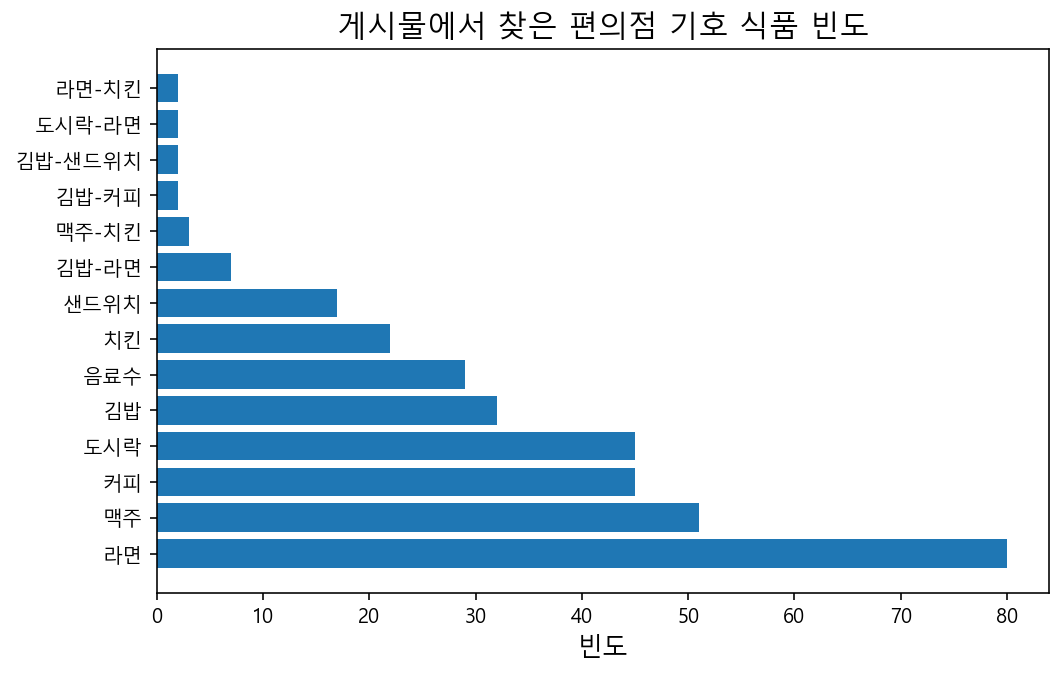

In [26]:
x = dc['label'].value_counts()[1:15].index
y = dc['label'].value_counts()[1:15].values

plt.figure(figsize=(8, 5))
plt.title('게시물에서 찾은 편의점 기호 식품 빈도', size=15)
plt.barh(x, y)
plt.xlabel('빈도', size=13)

### TFIDF - 예시

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
docs = [
    '편의점 에서 가장 맛있는 건 치킨 입니다. 역시 치킨',
    '편의점 도시락 요새 맛있어요',
    '커피 편의점 에서 파는 군요'
]

tfidf_vect = TfidfVectorizer()

tfidf_vect.fit(docs)
tfidf_array = tfidf_vect.transform(docs).toarray()
tfidf_voca = tfidf_vect.vocabulary_

df_exam = pd.DataFrame(data=tfidf_array, columns=tfidf_voca, index=['문서1','문서2','문서3'])

df_exam.T

,문서1,문서2,문서3
편의점,0.334689,0.000000,0.000000
에서,0.000000,0.000000,0.504611
가장,0.000000,0.546454,0.000000
맛있는,0.334689,0.000000,0.000000
치킨,0.000000,0.546454,0.000000
입니다,0.254540,0.000000,0.383770
역시,0.334689,0.000000,0.000000
도시락,0.000000,0.546454,0.000000
요새,0.334689,0.000000,0.000000
맛있어요,0.669378,0.000000,0.000000


## TFIDF 디시인사이드 적용

In [29]:
dosirak = " ".join(dc[dc['label']=='도시락']['글_한글'].tolist())
noodle = " ".join(dc[dc['label']=='라면']['글_한글'].tolist())
kimbob = " ".join(dc[dc['label']=='김밥']['글_한글'].tolist())
coffee = " ".join(dc[dc['label']=='커피']['글_한글'].tolist())

In [30]:
docs = [dosirak, noodle, kimbob, coffee]

In [31]:
tfidf = TfidfVectorizer().fit(docs)
tfidf_array = tfidf.transform(docs).toarray()
tfidf_voca = tfidf.vocabulary_

df_tfidf = pd.DataFrame(tfidf_array, columns=tfidf_voca, index=['도시락','라면','김밥','커피'])

In [32]:
df_tfidf_t = df_tfidf.T
df_tfidf_t.sort_values(by='도시락', ascending=False)[:15]

,도시락,라면,김밥,커피
이키나리,0.590904,0.000000,0.000000,0.000000
옷도,0.385447,0.209265,0.472974,0.317331
한번도,0.196968,0.000000,0.000000,0.000000
스테이크,0.098484,0.000000,0.000000,0.000000
댐배재고확인,0.077646,0.009033,0.000000,0.000000
담배사는데,0.077646,0.009033,0.000000,0.000000
상대하는데,0.077646,0.018066,0.000000,0.000000
같은곳에서,0.073863,0.000000,0.000000,0.000000
매운거,0.073863,0.000000,0.000000,0.000000
데려가는,0.073863,0.000000,0.000000,0.000000


## 유튜브 - 3장 끝에 위치

In [33]:
data = pd.read_csv(filepath + "/편의점상품_데이터_병합.csv")

In [34]:
data.head(2)

,검색어,비디오ID,비디오주소,제목,비디오설명,댓글,좋아요수
0,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,흔들리지 않는 편안함 &quot;캔뚜껑&quot;,0.0
1,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,온라인 홀 덤 은 덤^홀^덤 미만 잡 아니냐 여기 못따라감 다해봤는데,0.0


In [35]:
print("데이터 크기 :", data.shape)
data['좋아요수'].describe()

데이터 크기 : (13006, 7)


count    13005.000000
mean         7.976471
std         88.566202
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       4378.000000
Name: 좋아요수, dtype: float64

좋아요 2개 이상 데이터만 추출

In [36]:
data_1 = data[data['좋아요수']>1]
print("데이터 크기 :", data_1.shape)

데이터 크기 : (2467, 7)


In [37]:
stopwords = ['쓰레기','금지','구독','불매','유통기한']

data_2 = data_1[(~data_1['댓글'].str.contains(stopwords[0]))&
                (~data_1['댓글'].str.contains(stopwords[1]))&
                (~data_1['댓글'].str.contains(stopwords[2]))&
                (~data_1['댓글'].str.contains(stopwords[3]))&
                (~data_1['댓글'].str.contains(stopwords[4]))]

print("데이터 크기 :", data_2.shape)


데이터 크기 : (2279, 7)


In [38]:
data_3 = data_2.drop_duplicates(subset='댓글')
data_3.reset_index(drop=True, inplace=True)
print("데이터 크기 :", data_3.shape)
data_3.head(3)

데이터 크기 : (2270, 7)


,검색어,비디오ID,비디오주소,제목,비디오설명,댓글,좋아요수
0,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,근데 앞에꺼먹어도 신선도 크게상관없는데... 뒤에껄먹으면 앞에 것이 안팔려서 폐기 ...,2.0
1,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,"선입선출은 구매자가 도와줘야 할 중요한 덕묵 이니라,,<br>그런데 잘난 척 하면서...",4.0
2,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,다들 선입선출 반대로 가져가버리면 폐기율이 늘어납니다 <br> 그러면 폐기율 줄이려...,2.0


형태소 분석을 통해 명사와 동사를 추출

In [39]:
kiwi = Kiwi()
def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사, 형용사 추출해 리스트로 반환"""

    tokens = kiwi.tokenize(text)

    target_idxs = []
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form)>1:
                target_words.append(wrd.form)
                target_idxs.append('noun')
        elif ('VV' in wrd.tag) or ('VA' in wrd.tag) or ('XSV' in wrd.tag):
            tmp_form = wrd.form + "다"
            target_words.append(tmp_form)
            target_idxs.append('verb')

    return target_words, target_idxs

In [40]:
def find_intension_one_text(words, words_tag):
    """문장내 의도를 나타내는 단어를 추출한다"""
    intensions=[]
    for idx, tag in enumerate(words_tag):
        try:
            if tag=='verb':
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])

    return intensions

In [41]:
def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs )
    return intensions

In [42]:
# 한글만 추출
data_3['댓글'] = data_3['댓글'].astype('str')
data_3['댓글_한글'] = data_3['댓글'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x)))
data_3['의도'] = data_3['댓글_한글'].apply(lambda x:find_intension(x))
data_3.sort_values(by='좋아요수', ascending=False)[:10]

C:\Users\it\AppData\Local\Temp\ipykernel_11552\340894074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['댓글'] = data_3['댓글'].astype('str')
C:\Users\it\AppData\Local\Temp\ipykernel_11552\340894074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['댓글_한글'] = data_3['댓글'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x)))
C:\Users\it\AppData\Local\Temp\ipykernel_11552\340894074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,검색어,비디오ID,비디오주소,제목,비디오설명,댓글,좋아요수,댓글_한글,의도
92,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,편의점 알바하면서 제일 짜증났던게 선입선출 해도 손님들이 저 팁은 대부분 다 알고있...,4378.0,편의점 알바하면서 제일 짜증났던게 선입선출 해도 손님들이 저 팁은 대부분 다 알고있...,"[편의점, 알바하다, 짜증나다, 선출하다, 부분알다, 뒤에껄가져오다, 가져오다밀다,..."
140,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,다른건 알고있었는데 마지막꺼는 진짜 대박이네요. 접근성도 좋고 24시 영업이고 cc...,3558.0,다른건 알고있었는데 마지막꺼는 진짜 대박이네요 접근성도 좋고 시 영업이고 있고 편의...,"[, 마지막, 접근좋다, 영업, 편의점하다, 도움되다, 방법같다, 같다잃다, 아이도..."
124,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,근처에 경찰서가없을때 24시간하는 편의점 그기능대신해주는게 제일좋네,2430.0,근처에 경찰서가없을때 시간하는 편의점 그기능대신해주는게 제일좋네,"[근처, 경찰서없다, 시간하다, 편의점, 기능, 대신하다, 하다좋다]"
101,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,"<a href=""https://www.youtube.com/watch?v=kLYKJ...",2352.0,내 잃어버린 편돌이 년,[잃어버리다]
435,편의점 상품,jr3QpU5VusQ,https://www.youtube.com/watch?v=jr3QpU5VusQ,"편의점 별, 각각 거기서만 파는 존맛탱 제품들 총정리!! 이건 무조건 사먹어야 해ㅜㅜ",안녕하세요~! 감성지식 채널 이슈텔러 입니다~^^ 구독 + 좋아요~ 부탁드려욧!^^...,gs cu 이마트 다 해본 편순이입니다 모짜치즈김밥 딸기샌드위치 오모리김치찌게 이천...,2053.0,이마트 다 해본 편순이입니다 모짜치즈김밥 딸기샌드위치 오모리김치찌게 이천쌀콘 꼭 드...,"[이마트하다, 편순이, 모짜치즈, 김밥, 딸기, 샌드위치, 오모리김치찌게, 이천들다..."
251,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,"<a href=""https://www.youtube.com/watch?v=kLYKJ...",1934.0,내가 뭘 본거지,[보다]
141,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,잡아당기면 앞으로 쑥 나오는건 ㄹㅇ 몰랐네,1610.0,잡아당기면 앞으로 쑥 나오는건 몰랐네,"[, 잡아당기다나오다, 나오다모르다]"
1062,편의점 상품,AAMWbxXbpxY,https://www.youtube.com/watch?v=AAMWbxXbpxY,정말 상상도 못한 1위.. 편의점에서 지난 1년 동안 가장 많이 팔린 제품 TOP10,안녕하세요~! 감성지식 채널 이슈텔러 입니다~^^ 구독 + 좋아요~ 부탁드려욧!^^...,고정해주시면 여친생겨요ㅎㅎ,1181.0,고정해주시면 여친생겨요,"[고정하다, 여친생기다]"
20,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,진짜 미아들 편의점에 데려다 주는거 너무 좋은 생각이다..눈물 날 뻔 했네..70여...,1098.0,진짜 미아들 편의점에 데려다 주는거 너무 좋은 생각이다 눈물 날 뻔 했네 여명 정도...,"[아들, 편의점데리다, 데리다주다, 주다좋다, 생각, 눈물나다, 여명, 정도찾다, ..."
460,편의점 상품,jr3QpU5VusQ,https://www.youtube.com/watch?v=jr3QpU5VusQ,"편의점 별, 각각 거기서만 파는 존맛탱 제품들 총정리!! 이건 무조건 사먹어야 해ㅜㅜ",안녕하세요~! 감성지식 채널 이슈텔러 입니다~^^ 구독 + 좋아요~ 부탁드려욧!^^...,와.... 집구석에만 쳐박혀 있다가 이런거 있는줄 상상도 못했네 이렇게 맛있는게 많...,1094.0,와 집구석에만 쳐박혀 있다가 이런거 있는줄 상상도 못했네 이렇게 맛있는게 많았다니 ...,"[집구석치다, 치다박히다, 박히다있다, 상상하다, 하다이렇다, 이렇다맛있다, 맛있다..."


In [43]:
df_tube = data_3.copy()

### 다빈도단어 분석

In [44]:
from collections import Counter

In [45]:
intensions = []
for i in range(df_tube.shape[0]):
    # intention = ast.literal_eval(df_tube['의도'][i])
    intention = df_tube['의도'][i]
    intensions.append(intention)

intensions = sum(intensions, [])
intension_tokens = [intent for intent in intensions if len(intent)>1]
intension_tokens[:4]

['끄다먹다', '신선크다', '상관없다', '없다먹다']

In [46]:
word_count = Counter(intension_tokens).most_common()

In [47]:
keys =[]
counts = []
for i in range(len(word_count)):
    key = word_count[i][0]
    cnt = word_count[i][1]

    keys.append(key)
    counts.append(cnt)
df_count = pd.DataFrame({"word":keys, "count":counts})

In [48]:
df_count[df_count['count']>6][:200]

,word,count
0,편의점,327
1,알바,147
2,알바하다,108
3,감사하다,87
4,사장,85
...,...,...
195,대신,9
196,곤드레,9
197,대형,9
198,결제,9


In [49]:
## 저자님 이 부분 오류 납니다. - 건너뛰고 실행합니다.
df_tube['의도'] = df_tube['의도'].astype('str')
products = ['얼음','라면','우유','딸기','스팸','샌드위치']
sums = []

for product in products:
    sum_value = df_tube[df_tube['의도'].str.contains(product)]['좋아요수'].sum()
    sums.append(sum_value)

pd.DataFrame({"상품종류":products, "좋아요수_합계":sums}).sort_values(by='좋아요수_합계', ascending=False)

,상품종류,좋아요수_합계
5,샌드위치,4080.0
3,딸기,3794.0
1,라면,3105.0
0,얼음,1284.0
2,우유,1009.0
4,스팸,361.0


nGram 분석

In [50]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams =[]
    for i in range(0, int(len(tokens))):
        bigrams.append(tokens[i:i+n])

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

In [51]:
bigram = getGram(tokens=intension_tokens, n=2)
trigram = getGram(tokens=intension_tokens, n=3)

In [52]:
bigram[bigram['index'].str.contains('하다')][:10]

,index,nGram
0,편의점 알바하다,33
3,정보 감사하다,12
7,영상 감사하다,9
13,폐기달다 달다하다,7
14,계산하다 하다하다,7
19,생각하다 하다되다,5
20,생각하다 편의점,5
22,신분증 검사하다,5
23,알바하다 폐기먹다,5
25,리뷰 감사하다,5


In [53]:
trigram[trigram['index'].str.contains('하다')][:6]

,index,nGram
1,편의점 알바 정도하다,3
2,편의점 알바하다 하다하다,3
6,편의점 알바하다 폐기먹다,2
7,입력하다 수량 변경하다,2
8,숫자 입력하다 수량,2
9,옛날 편의점 알바하다,2


### LDA 분석 - 토픽모델링

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
df_tube['비디오설명'].fillna("없음", inplace=True)
df_tube['제목_비디오설명'] = df_tube['제목']+" "+df_tube['비디오설명']
df_tube['제목_비디오설명_한글'] = df_tube['제목_비디오설명'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x)))

In [56]:
df_tube.head(1)

,검색어,비디오ID,비디오주소,제목,비디오설명,댓글,좋아요수,댓글_한글,의도,제목_비디오설명,제목_비디오설명_한글
0,편의점 상품,kLYKJXh5psk,https://www.youtube.com/watch?v=kLYKJXh5psk,와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,편의점 #꿀팁 #CU #세븐일레븐 #미니스톱 #GS25 #맥주 #캔 #CCTV #1...,근데 앞에꺼먹어도 신선도 크게상관없는데... 뒤에껄먹으면 앞에 것이 안팔려서 폐기 ...,2.0,근데 앞에꺼먹어도 신선도 크게상관없는데 뒤에껄먹으면 앞에 것이 안팔려서 폐기 엄청나...,"['', '끄다먹다', '신선크다', '상관없다', '없다먹다', '먹다팔리다', ...",와.. 이 방법 한번 알면 예전으로는 못 돌아갑니다 (편의점 가끔이라도 간다면 무조...,와 이 방법 한번 알면 예전으로는 못 돌아갑니다 편의점 가끔이라도 간다면 무조건 미...


In [57]:
def compress_sent(text):
    """문서 압축 효과"""
    text_token = [txt for txt in text.split() if len(txt)>1]
    return " ".join(text_token)

In [58]:
df_tube['제목_비디오설명_한글_압축'] = df_tube['제목_비디오설명_한글'].apply(lambda x:compress_sent(x))
df_tube_lda = df_tube.copy()
df_tube_lda.isnull().sum()

검색어               0
비디오ID             0
비디오주소             0
제목                0
비디오설명             0
댓글                0
좋아요수              0
댓글_한글             0
의도                0
제목_비디오설명          0
제목_비디오설명_한글       0
제목_비디오설명_한글_압축    0
dtype: int64

In [59]:
df_tube_lda.dropna(inplace=True)
df_tube_lda.isnull().sum()

검색어               0
비디오ID             0
비디오주소             0
제목                0
비디오설명             0
댓글                0
좋아요수              0
댓글_한글             0
의도                0
제목_비디오설명          0
제목_비디오설명_한글       0
제목_비디오설명_한글_압축    0
dtype: int64

영상 제목과 설명에 대해 LDA

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
list_sent = df_tube_lda['제목_비디오설명_한글_압축'].tolist()
list_sent = list(set(list_sent))

tfidf = TfidfVectorizer(max_df=0.95, max_features=1000, ngram_range=(1,2)).fit(list_sent)
tfidf_array = tfidf.transform(list_sent).toarray()
tfidf_voca = tfidf.vocabulary_

df_sent = pd.DataFrame(tfidf_array, columns=tfidf_voca)
df_sent.head()

,편의점,단축키로,결제하는방법,고인물들은,계산,계산속도,알바초보분들필수,단축키로결제하기,편의점 단축키로,단축키로 결제하는방법,...,주문 오신,오신 초보,초보 사장님들,도움되시라고 초반,초반 택배에,택배에 대해서,대해서 설명드렸습니다,도움 되시길,되시길 바래요,달리는개미 메일
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.145683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.232783,0.232783,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.134003,0.134003,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.decomposition import LatentDirichletAllocation

In [63]:
import sklearn
print("sklearn 버전 :", sklearn.__version__)

sklearn 버전 : 1.0.2


In [64]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(tfidf.transform(list_sent))

words_data = tfidf.get_feature_names()
for idx, topic in enumerate(lda.components_):
    print("주제 #", idx)

    topic_wrd_idxs = topic.argsort()[::-1]
    top_idxs = topic_wrd_idxs[:20]

    concat = ' '.join(words_data[i] for i in top_idxs)
    print(concat)

주제 # 0
편의점에서 미성년자 편의점에서 상품 편의점에서 파는 파는 이벤트인가 이벤트인가 편의점에서 전격리뷰 상품 전격리뷰 벚꽃에디션 상술인가 이벤트인가 상술인가 벚꽃에디션 상품 파는 벚꽃에디션 과연 과연 무슨 파는 벚꽃 돈주고 요고어때 전격리뷰 상술인가
주제 # 1
진상 유튜브 커뮤니티 커뮤니티 카페 메일 네이버 네이버 네이버 유튜브 유튜브 커뮤니티 카페 메일 유커 편의점 카페 유커 유커 편의점 편의점 알바 몇가지 알바 알바 진상 몇가지 메일 편의점 알바생이
주제 # 2
편의점 편의점알바 회사를 시그널 이제훈 배우기 중급 알고 마이린 마이맘 가격 편의점 상품 꿀팁 편의점에 자주 이야기속의 알바의 일하고 일하고 있습니다 되어
주제 # 3
자주 하는 영상 메일 필수 영상 필수 초보 알바생 알바생 필수 알바생이 자주 하는 실수 초보 하는 알바생 영상 자주 파는 존맛탱 이건 무조건 총정리 이건 편의점 각각 이건 총정리 제품들
주제 # 4
편의점 디저트 디저트 편의점 이마트 마세요 진상 드리지 폐기 상품 알바생은 폐기 마세요 알바생은 드리지 마세요 편의점 알바생은 동안 하나도 편순이들 시키려고 하나도 편순이들 편돌이 편순이들 하나도 팔린 팔린 제품은 오늘도 애쓰는
주제 # 5
몽골 한국 편의점 제품이 세븐일레븐 유형 몇가지 유형 행사상품 사는 장악한 단품관리 유통기한 지난 유통기한 이렇게 이렇게 어렵습니다 어렵습니다 편의점 행사상품 없던 이유 충격 충격 일자 이유 그것은
주제 # 6
알바초보분들필수 편의점 좋을 알아두면 알아두면 좋을 고인물들은 방법으로 단축키로 결제하는방법 단축키로결제하기 편의점 단축키로 단축키로결제하기 알바초보분들필수 알바초보분들필수 단축키로결제하기 단축키로 고인물들은 계산속도 빨라지는 계산속도 계산 계산속도 계산 결제하는방법 고인물들은 결제하는방법 알면 예전으로는
주제 # 7
편의점브이로그 편의점 되는 임박 폐기 임박 임박 상품이 인스타 쇼핑몰 인스타 월행사상품 편의점 월행사상품 편의점 완전이득 행사상품 추천 완전이득 행사상품 완전이득 쇼핑몰 

C:\Users\it\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
